In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

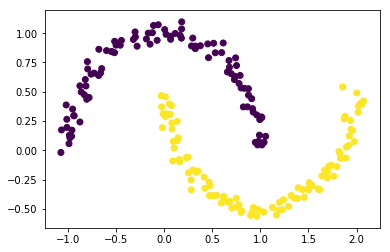

In [31]:
x_train, y_train = make_moons(n_samples=200, noise=0.05)
y_train = np.atleast_2d(y_train).T
plt.scatter(x_train[:,0], x_train[:,1], c=y_train[:,0])

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Number of samples, input units, number of output units:

In [38]:
assert x_train.shape[0] == y_train.shape[0]
x_train.shape[0], x_train.shape[1], y_train.shape[1]

(200, 2, 1)

\begin{align*}
h_\Theta(x) &= a^{(j + 1)} \\
a^{(j)} &= g(z^{(j)}) \\
z^{(j)} &= \Theta^{(j - 1)}a^{(j - 1)}
\end{align*}

Where $g$ is an activation function applied element-wise, $a^{(1)} = x$ (the overall network input), and $a^{(j)}_0 = 1$ for a bias unit for all layers $j$.

In [73]:
"""Theta is a matrix of j rows and i columns where each row is an output unit
and each column is a corresponding input weight. Thus there are j rows for the
number of units in the next layer and i columsn for the number of units in the
input layer.
"""
def compute_a(theta, layer, activation_func):
    z = np.matmul(theta, layer)
    return activation_func(z)


def feed_forward(weights, input_layer, activation_func):
    a = [input_layer]
    for theta in weights:
        a.append(compute_a(theta, a[-1], activation_func))
    return a

In [76]:
a1 = np.atleast_2d([ 0.1, 0.2, 0.3 ]).T
a2 = np.atleast_2d([ 0.2, 0.5 ]).T
weights = [
    np.array([
        [ 0.2, 0.3, 0.4 ],  # Weights for each input unit to output unit 1
        [ 0.7, 0.8, 0.9 ]   # Weights for each input unit to output unit 2
    ]),
    np.array([
        [ 0.1, 0.3 ],       # The previous layer had two output units, which means two columns.
        [ 0.4, 0.6 ],       # This layer has three units, which means three rows.
        [ 0.5, 0.7 ],
    ])
]

assert np.array_equal(np.matmul(weights[0], a1), a2)
for layer in feed_forward(weights, a1, sigmoid):
    print(layer)

[[ 0.1]
 [ 0.2]
 [ 0.3]]
[[ 0.549834  ]
 [ 0.62245933]]
[[ 0.56013777]
 [ 0.64414699]
 [ 0.67054224]]
